In [3]:
import matplotlib.pyplot as plt
import scipy
import numpy as np

Pearson's correlation coefficient: $$\rho = \frac{\sum\limits_{i=1}^{n}\left(a_i - a_\mu\right)\left(b_i - b_\mu\right)}{\sigma_a \sigma_b}$$

Spearman's correlation coefficient: $$\rho = \frac{\sum\limits_{i=1}^{n}\left(a_{i,rank} - a_{\mu,rank}\right)\left(b_{i,rank} - b_{\mu,rank}\right)}{\sigma_{a,rank} \sigma_{b,rank}}$$

--------------------------------
mode: two-sided
Pearson: -6.6590e-01; p-value: +3.4454e-132
Spearman: -6.5787e-01; p-value: +5.5296e-128
--------------------------------
mode: greater
Pearson: -6.6590e-01; p-value: +1.0000e+00
Spearman: -6.5787e-01; p-value: +1.0000e+00
--------------------------------
mode: less
Pearson: -6.6590e-01; p-value: +1.7227e-132
Spearman: -6.5787e-01; p-value: +2.7648e-128


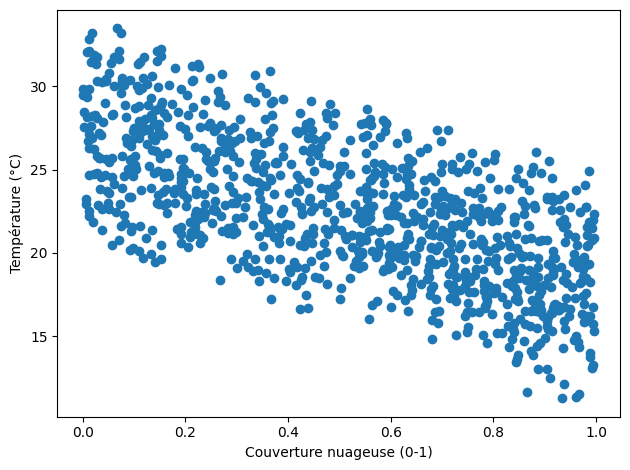

In [33]:
n = np.linspace(0.0, 1.0, 1024)

r = 10.0

a = np.random.random(1024)
a_mu = np.mean(a)
a_std = np.std(a)

b = []
b_mu = 15.0
b_std = 5.0
for i in a:
    c = (np.random.random(1)[0] * b_std - (i - a_mu) * r) + b_mu + np.random.random(1)[0] * r
    b.append(c)

for mode in ["two-sided", "greater", "less"]:
    print("-" * 32)
    print("mode:", mode)
    corr, p = scipy.stats.pearsonr(a,b, alternative=mode)
    print(f"Pearson: {corr:+.4e}; p-value: {p:+.4e}")
    corr, p = scipy.stats.spearmanr(a,b, alternative=mode)
    print(f"Spearman: {corr:+.4e}; p-value: {p:+.4e}")

plt.scatter(a,b)
plt.xlabel("Couverture nuageuse (0-1)")
plt.ylabel("Température (°C)")
plt.tight_layout()
plt.show()



n: 16384; prob: 0.0100; p-value: +0.0000e+00
n: 16384; prob: 0.0200; p-value: +0.0000e+00
n: 16384; prob: 0.0300; p-value: +0.0000e+00
n: 16384; prob: 0.0400; p-value: +0.0000e+00
n: 16384; prob: 0.0500; p-value: +0.0000e+00
n: 16384; prob: 0.0600; p-value: +0.0000e+00
n: 16384; prob: 0.0700; p-value: +0.0000e+00
n: 16384; prob: 0.0800; p-value: +0.0000e+00
n: 16384; prob: 0.0900; p-value: +0.0000e+00
n: 16384; prob: 0.1000; p-value: +0.0000e+00
n: 16384; prob: 0.1100; p-value: +0.0000e+00
n: 16384; prob: 0.1200; p-value: +0.0000e+00
n: 16384; prob: 0.1300; p-value: +0.0000e+00
n: 16384; prob: 0.1400; p-value: +0.0000e+00
n: 16384; prob: 0.1500; p-value: +0.0000e+00
n: 16384; prob: 0.1600; p-value: +0.0000e+00
n: 16384; prob: 0.1700; p-value: +0.0000e+00
n: 16384; prob: 0.1800; p-value: +0.0000e+00
n: 16384; prob: 0.1900; p-value: +0.0000e+00
n: 16384; prob: 0.2000; p-value: +0.0000e+00
n: 16384; prob: 0.2100; p-value: +0.0000e+00
n: 16384; prob: 0.2200; p-value: +0.0000e+00
n: 16384; 

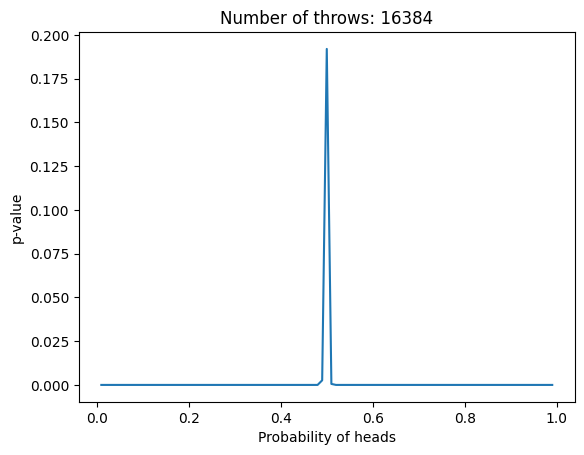

In [32]:

def lancer_n_pieces(n=16, p=0.5):
    a = np.random.random(n)
    a = np.array(a >= p, dtype=np.int8)
    return a

n = 4096 * 4
x = []
y = []
for prob in np.linspace(0.01, 0.99, 99):
    serie_n_pieces = lancer_n_pieces(n=n, p=prob)
    result = scipy.stats.binomtest(k=sum(serie_n_pieces), n=n, p=0.5)
    print(f"n: {n}; prob: {prob:.4f}; p-value: {result.pvalue:+.4e}")
    x.append(prob)
    y.append(result.pvalue)
plt.plot(x, y)
plt.xlabel("Probability of heads")
plt.ylabel("p-value")
plt.title(f"Number of throws: {n}")
plt.show()


# p-value

Dans un pile-ou-face, on souhaite savoir si la pièce est biaisée.
Moyen: lancer la pièce un grand nombre de fois, et voir si une tendance émerge.

Exemple : lancer_la_piece(n=256, p=0.25)

_Problème: même si la pièce n'est pas biaisée, la série qu'on observe reste possible._

Se pose alors la question : quelle est la probabilité d'observer une série au moins aussi extrême que celle observée (dans notre cas, s'écarter encore plus du 50/50).
Cela correspond à la *p-value*.

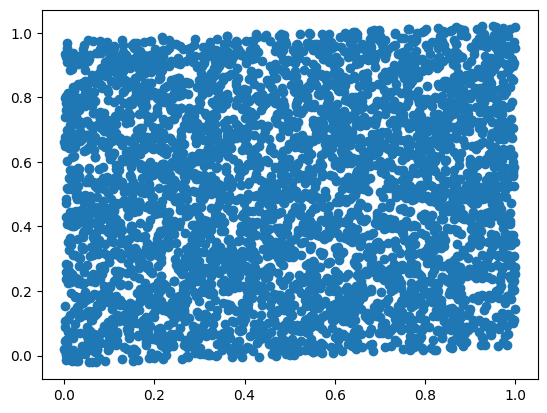

correlation: 0.0573; p-value: 0.0002


In [12]:
n = 4096
a = np.random.random(n)
b = np.random.random(n)
a_delta_to_mu = a - np.mean(a)
b_delta_to_mu = b - np.mean(b)
a_delta_to_mu_norm = a_delta_to_mu / np.std(a)
b_delta_to_mu_norm = b_delta_to_mu / np.std(b)
b += a_delta_to_mu_norm * 0.015
plt.scatter(a,b)
plt.show()

corr, p = scipy.stats.pearsonr(a,b)
print(f"correlation: {corr:.4f}; p-value: {p:.4f}")